In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=987ca145d4d27ed10b73a7668b5a505309cbe2a9af975b755505125ba0d6e8e0
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz

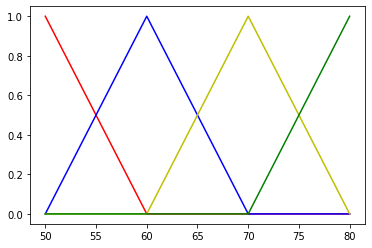

In [4]:
import matplotlib.pyplot as plt 
#Create x-axis
x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
full_speed = fuzz.trimf(x,[70,80,80])
#Draw
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label='Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label='Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label='Medium fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label='Full speed')

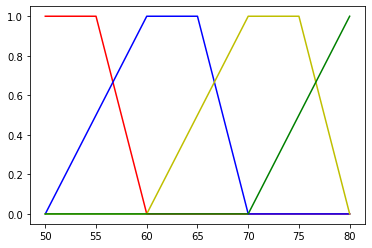

In [5]:
import matplotlib.pyplot as plt 
#Create x-axis
x = np.arange(50,81,1)
slow = fuzz.trapmf(x,[50,50,55,60])
medium = fuzz.trapmf(x,[50,60,65,70])
medium_fast = fuzz.trapmf(x,[60,70,75,80])
full_speed = fuzz.trapmf(x,[70,80,80,80])
#Draw
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label='Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label='Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label='Medium fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label='Full speed')

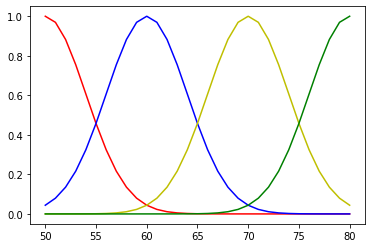

In [6]:
import matplotlib.pyplot as plt 
#Create x-axis
x = np.arange(50,81,1)
slow = fuzz.gaussmf(x,50,4) 
medium = fuzz.gaussmf(x,60,4)
medium_fast = fuzz.gaussmf(x,70,4) 
full_speed = fuzz.gaussmf(x,80,4)
#Draw
plt.figure()
plt.plot(x,slow,'r',linewidth = 1.5,label='Slow')
plt.plot(x,medium,'b',linewidth = 1.5,label='Medium')
plt.plot(x,medium_fast,'y',linewidth = 1.5,label='Medium fast')
plt.plot(x,full_speed,'g',linewidth = 1.5,label='Full speed')

23.20769230769231


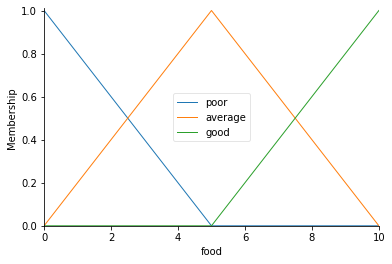

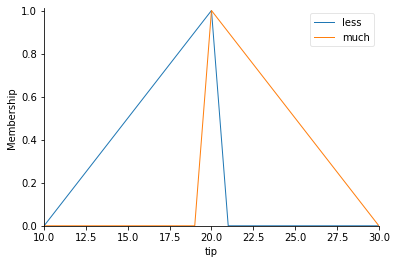

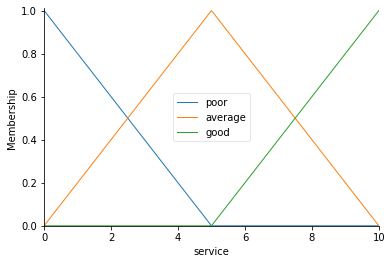

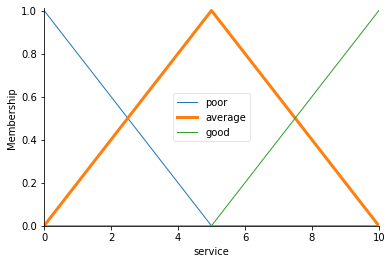

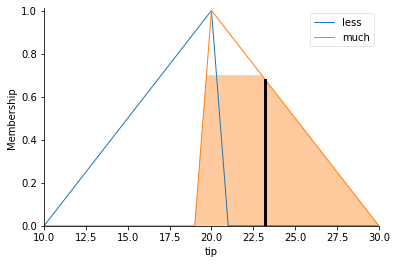

In [7]:
import numpy as np
import skfuzzy as fuzz

from skfuzzy import control as ctrl
#đầu vào
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
#đầu ra
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])                         

tip['less']=fuzz.trimf(tip.universe,[10,20,20])
tip['much']=fuzz.trimf(tip.universe,[20,20,30])

food.view()
tip.view()
service.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['much'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
#chương trình học Rule 1-9
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
#input
tipping.input['food']=6.5
tipping.input['service']=5.8

tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

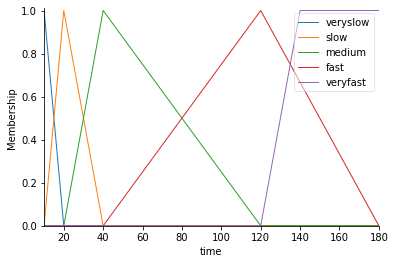

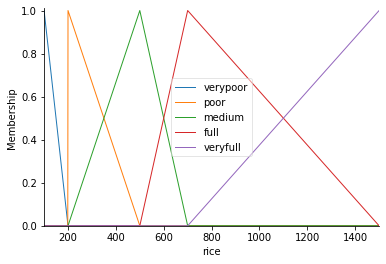

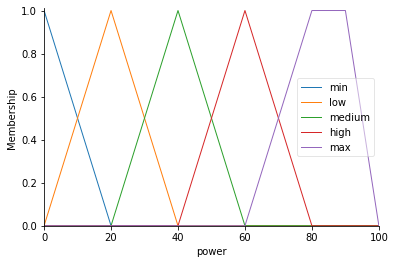

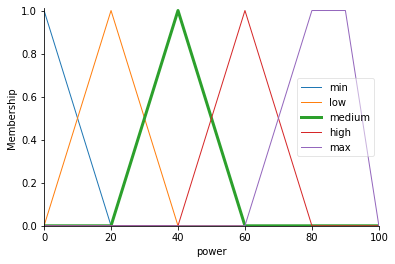

In [8]:
#Rice Cook
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time  = ctrl.Antecedent(np.arange(10,181,1), 'time')
rice  = ctrl.Antecedent(np.arange(100,1500,1),  'rice')

power = ctrl.Consequent(np.arange(0,101,1), 'power')

time['veryslow'] = fuzz.trimf(time.universe, [10,10,20])
time['slow']     = fuzz.trimf(time.universe, [10,20,40])
time['medium']   = fuzz.trimf(time.universe, [20,40,120])
time['fast']     = fuzz.trimf(time.universe, [40,120,180])
time['veryfast'] = fuzz.trapmf(time.universe,[120,140,180,180])

rice['verypoor'] = fuzz.trimf(rice.universe, [100, 100, 200])
rice['poor']     = fuzz.trimf(rice.universe, [200, 200, 500])
rice['medium']   = fuzz.trimf(rice.universe, [200, 500, 700])
rice['full']     = fuzz.trimf(rice.universe, [500, 700, 1500])
rice['veryfull'] = fuzz.trimf(rice.universe, [700, 1500,1500])

power['min']    = fuzz.trimf(power.universe, [0,0,20])
power['low']    = fuzz.trimf(power.universe, [0,20,40])
power['medium'] = fuzz.trimf(power.universe, [20,40,60])
power['high']   = fuzz.trimf(power.universe, [40,60,80])
power['max']    = fuzz.trapmf(power.universe, [60,80,90,100])

time.view()
rice.view()
power.view()
power['medium'].view()

In [9]:
rule1  = ctrl.Rule(rice['verypoor']&time['veryslow'],power['min'])
rule2  = ctrl.Rule(rice['verypoor']&time['slow'],power['min'])
rule3  = ctrl.Rule(rice['verypoor']&time['medium'],power['min'])
rule4  = ctrl.Rule(rice['verypoor']&time['fast'],power['low'])
rule5  = ctrl.Rule(rice['verypoor']&time['veryfast'],power['low'])
rule6  = ctrl.Rule(rice['poor']&time['veryslow'],power['min'])
rule7  = ctrl.Rule(rice['poor']&time['slow'],power['min'])
rule8  = ctrl.Rule(rice['poor']&time['medium'],power['low'])
rule9  = ctrl.Rule(rice['poor']&time['fast'],power['low'])
rule10 = ctrl.Rule(rice['poor']&time['veryslow'],power['low'])
rule11 = ctrl.Rule(rice['medium']&time['veryslow'],power['low'])
rule12 = ctrl.Rule(rice['medium']&time['slow'],power['low'])
rule13 = ctrl.Rule(rice['medium']&time['medium'],power['medium'])
rule14 = ctrl.Rule(rice['medium']&time['fast'],power['high'])
rule15 = ctrl.Rule(rice['medium']&time['veryfast'],power['high'])
rule16 = ctrl.Rule(rice['full']&time['veryslow'],power['low'])
rule17 = ctrl.Rule(rice['full']&time['slow'],power['medium'])
rule18 = ctrl.Rule(rice['full']&time['medium'],power['medium'])
rule19 = ctrl.Rule(rice['full']&time['fast'],power['high'])
rule20 = ctrl.Rule(rice['full']&time['veryfast'],power['max'])
rule21 = ctrl.Rule(rice['veryfull']&time['veryslow'],power['medium'])
rule22 = ctrl.Rule(rice['veryfull']&time['slow'],power['medium'])
rule23 = ctrl.Rule(rice['veryfull']&time['medium'],power['high'])
rule24 = ctrl.Rule(rice['veryfull']&time['fast'],power['max'])
rule25 = ctrl.Rule(rice['veryfull']&time['veryfast'],power['max'])

6.666666666666667


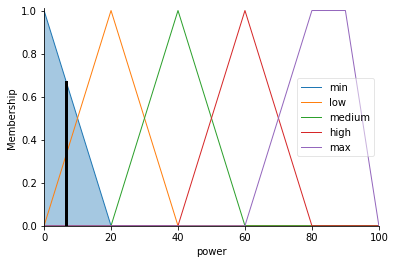

In [10]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule2])

powering = ctrl.ControlSystemSimulation(powering_ctrl)

powering.input['rice']=100
powering.input['time']=20

powering.compute()
print(powering.output['power'])
power.view(sim=powering)